In [4]:
import os
import imageio
import os
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.1 MB/s eta 0:00:000:00:01m eta 0:00:01


In [7]:
# import dataset
radiomic = pd.read_csv('radiomic.csv',index_col=['patient'])
radiomic.index.name = None
radiomic

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,disease
[['98472']],1.188696,2.372984,8460.498535,-3.203427e-16,0.475326,4.466517,3.597554,0.371204,1.930298,2.026560,...,2.224991e-07,-3.203427e-16,0.000472,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000,0.000000,3
[['MR048994B']],-0.198494,0.891536,1533.403584,7.591312e-01,0.520740,14.456129,4.923942,0.374042,0.327296,0.260775,...,3.076994e-01,3.235926e+00,0.003779,4.390594e+05,49.512876,0.007527,0.071721,0.012265,0.007538,2
[['112074']],0.489277,2.205282,6470.934679,1.656349e-01,0.886448,2.892500,2.926348,0.515566,1.475725,1.603291,...,7.653646e-02,3.121928e+00,0.004005,5.311234e+05,6.216520,0.041745,0.019187,0.000487,0.039200,3
[['90284']],0.839421,2.518100,4531.267991,-3.203427e-16,0.893965,2.339229,3.125282,0.502674,1.702676,1.723932,...,5.228241e-07,-3.203427e-16,0.000723,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000,0.000000,2
[['MR029209I']],0.384813,1.523654,9352.132334,2.317849e-02,0.583373,4.357846,3.265800,0.355696,0.926407,0.868522,...,2.200000e-01,2.521641e+00,0.000793,9.483888e+06,3.758426,0.066744,0.003396,0.000008,0.067475,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[['MR017260F']],0.276978,1.636446,15188.938602,8.080487e-02,0.551921,3.318225,3.331909,0.390929,1.037245,1.052572,...,3.078956e-01,3.022055e+00,0.001062,9.539203e+06,14.408057,0.017616,0.010049,0.000103,0.016974,2
[['MR054875']],0.205214,2.565832,3655.407485,2.368685e-01,1.330289,2.546688,3.676741,0.727518,1.228434,1.104603,...,6.216725e-02,2.807355e+00,0.004383,2.847016e+05,7.104273,0.037366,0.033516,0.001244,0.037579,2
[['103148']],0.521787,1.741757,4772.227578,9.535648e-03,0.653264,2.699510,2.570236,0.375097,1.043958,0.951075,...,4.166667e-01,1.584963e+00,0.000815,3.005335e+06,0.632664,0.395638,0.001373,0.000001,0.378976,2
[['MR053110B']],0.438975,0.824124,149.530644,-3.203427e-16,0.156248,11.597860,1.821742,0.149127,0.614326,0.551451,...,8.450514e-06,-3.203427e-16,0.002907,0.000000e+00,0.000000,1000000.000000,0.000000,0.000000,0.000000,2


In [6]:
df = radiomic.iloc[:,22:]

NameError: name 'radiomic' is not defined

In [ ]:
group_radiomic = [name.replace("original_","").split("_")[0] for name in df.columns]

In [ ]:
df.columns = pd.MultiIndex.from_tuples(list(zip(df.columns, group_radiomic)),names=('radiomicName', 'radiomicClass'))
df

#https://pyradiomics.readthedocs.io/en/latest/features.html#module-radiomics.shape2D

First Order Statistics (19 features) 

Shape-based (3D) (16 features)

Shape-based (2D) (10 features)

Gray Level Cooccurence Matrix (24 features)

Gray Level Run Length Matrix (16 features)

Gray Level Size Zone Matrix (16 features)

Neighbouring Gray Tone Difference Matrix (5 features)

Gray Level Dependence Matrix (14 features)

In [ ]:
def change_colnames(df,radiomic_group):
  for col in df.columns:
    df.rename(columns={col[0]:col[0].replace('original_shape_',"")},inplace=True)

In [ ]:
df_shape = df.filter(regex='original_shape|disease')
df_first_order = df.filter(regex='original_firstorder|disease')
df_glcm = df.filter(regex='original_glcm|disease')
df_gldm = df.filter(regex='original_gldm|disease')
df_glrlm = df.filter(regex='original_glrlm|disease')

radiomic_group = ["original_shape_","original_firstorder_","original_glcm_","original_gldm_","original_glrlm_"]
dfs = [df_shape,df_first_order,df_glcm,df_gldm,df_glrlm]

In [ ]:
for (df, colnames) in zip(dfs, radiomic_group):
  change_colnames(df,colnames)

In [ ]:
new_df = pd.concat(dfs, axis=1)
new_df

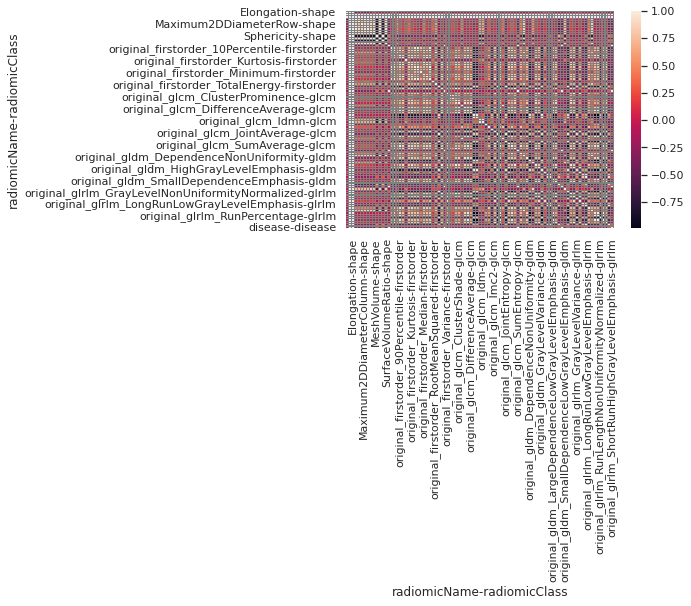

In [368]:
# Correlation Matrix

# get correlation matrix
corr = new_df.corr()
fig, ax = plt.subplots()

# create heatmap
# im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Heatmap
sns.heatmap(corr, annot=False, linewidths=0.1, linecolor='gray')


In [369]:
corr

,radiomicName,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,Sphericity,SurfaceArea,SurfaceVolumeRatio,VoxelVolume,disease,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,disease,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,...,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,disease,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,disease,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,disease
,radiomicClass,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,disease,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,disease,glcm,glcm,glcm,glcm,glcm,glcm,...,glcm,glcm,glcm,glcm,glcm,glcm,glcm,disease,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,disease,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,disease
radiomicName,radiomicClass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Elongation,shape,1.000000,NaN,NaN,-0.354769,-0.108627,-0.059665,-0.309288,-0.309288,-0.072324,0.163832,0.037756,-0.074198,-0.111467,-0.073241,-0.090882,0.107079,0.029733,-0.021536,-0.067578,-0.054888,-0.026673,-0.076937,-0.057769,0.063671,0.073328,0.045965,-0.096482,-0.053404,0.054575,-0.206321,-0.021536,0.072574,-0.050032,-0.090882,0.036077,-0.056426,-0.093440,-0.052120,-0.051734,-0.037653,...,0.070750,-0.076089,-0.024848,0.070998,0.055122,-0.069637,-0.052314,-0.090882,-0.059036,-0.102994,-0.065109,0.079746,0.003340,-0.050048,0.033575,0.076860,0.156443,-0.035670,-0.061142,-0.071849,-0.010959,-0.084119,-0.090882,-0.030583,0.063165,-0.051723,0.027091,0.051464,0.114988,-0.029362,-0.044253,-0.041190,-0.106782,-0.076083,-0.078165,0.048606,-0.072896,0.015452,-0.050679,-0.090882
Flatness,shape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [371]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = new_df.columns.get_level_values("radiomicClass")

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
# network_lut = dict(zip(map(str, networks), network_pal))

network_lut = {}
i = 0

for radiomic in networks:
  if radiomic not in network_lut:
    network_lut[radiomic] = network_pal[i]
    i = i + 1

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = new_df.columns.get_level_values("radiomicClass")
network_colors = pd.Series(networks, index=new_df.columns).map(network_lut)

network_lut = {}
i = 0

for radiomic in networks:
  if radiomic not in network_lut:
    network_lut[radiomic] = network_pal[i]
    i = i + 1


# Draw the full plot
g = sns.clustermap(new_df.fillna(0), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()


ValueError: ignored

<Figure size 864x936 with 0 Axes>

In [374]:
df

radiomicName,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,disease
radiomicClass,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,disease
0,90.382316,0.024072,165.611763,3171.730887,1.828673,5977.896525,0.001239,0.000890,6.401200,2702.158006,0.718829,0.821515,0.341542,0.872443,2747.251407,0.000828,1
1,76.033406,0.025976,156.059461,1200.471106,2.124278,3045.628298,0.005516,0.003336,6.241569,2038.500792,0.695454,0.789250,0.509391,0.858821,979.850761,0.003004,1
2,41.911341,0.019578,271.356231,3040.108286,1.521517,4721.319562,0.005145,0.003295,6.459025,1712.133039,0.799305,0.876074,0.216250,0.913508,2763.315864,0.002849,1
3,101.259312,0.119182,9.296751,179.439150,5.991914,1174.295385,0.039615,0.009904,5.028233,371.035263,0.433858,0.549611,2.579854,0.682598,116.556056,0.008050,3
4,99.124382,0.096233,14.505578,240.592843,4.835922,1208.886342,0.050598,0.014742,5.262678,472.284603,0.452682,0.585800,1.807676,0.695865,164.502582,0.011171,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,212.924427,0.105820,18.052321,532.983766,4.529775,2543.017703,0.011643,0.004253,5.236264,910.795061,0.449716,0.591203,1.606772,0.694176,359.651880,0.003544,3
3060,139.097755,0.082585,29.304358,503.669351,3.444914,1904.390179,0.014204,0.006882,5.358885,868.852246,0.511956,0.651413,1.048484,0.741234,358.305644,0.005836,3
3061,55.880007,0.047972,35.425188,297.929808,2.557441,829.256949,0.027356,0.011852,5.543549,699.943148,0.597521,0.727812,0.644551,0.800086,229.877162,0.009923,3


In [311]:
new_df.corr()

,radiomicName,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,Sphericity,SurfaceArea,SurfaceVolumeRatio,VoxelVolume,disease,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,...,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis
,radiomicClass,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,shape,disease,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,firstorder,glcm,glcm,glcm,glcm,glcm,glcm,glcm,...,glcm,glcm,glcm,glcm,glcm,glcm,glcm,glcm,glcm,glcm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,gldm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm,glrlm
radiomicName,radiomicClass,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Elongation,shape,1.000000,NaN,NaN,-0.354769,-0.108627,-0.059665,-0.309288,-0.309288,-0.072324,0.163832,0.037756,-0.074198,-0.111467,-0.073241,-0.090882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flatness,shape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LeastAxisLength,shape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [307]:
network_colors

radiomicName                                  radiomicClass
Elongation                                    shape            (0.7949032004362239, 0.5232533686100532, 0.742...
Flatness                                      shape            (0.7949032004362239, 0.5232533686100532, 0.742...
LeastAxisLength                               shape            (0.7949032004362239, 0.5232533686100532, 0.742...
MajorAxisLength                               shape            (0.7949032004362239, 0.5232533686100532, 0.742...
Maximum2DDiameterColumn                       shape            (0.7949032004362239, 0.5232533686100532, 0.742...
                                                                                     ...                        
original_glrlm_RunPercentage                  glrlm                                                          NaN
original_glrlm_RunVariance                    glrlm                                                          NaN
original_glrlm_ShortRunEmphasis     

In [293]:
networks

Index(['shape', 'shape', 'shape', 'shape', 'shape', 'shape', 'shape', 'shape',
       'shape', 'shape', 'shape', 'shape', 'shape', 'shape', 'disease',
       'firstorder', 'firstorder', 'firstorder', 'firstorder', 'firstorder',
       'firstorder', 'firstorder', 'firstorder', 'firstorder', 'firstorder',
       'firstorder', 'firstorder', 'firstorder', 'firstorder', 'firstorder',
       'firstorder', 'firstorder', 'firstorder', 'glcm', 'glcm', 'glcm',
       'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm',
       'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm', 'glcm',
       'glcm', 'glcm', 'glcm', 'gldm', 'gldm', 'gldm', 'gldm', 'gldm', 'gldm',
       'gldm', 'gldm', 'gldm', 'gldm', 'gldm', 'gldm', 'gldm', 'gldm', 'glrlm',
       'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm',
       'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm', 'glrlm'],
      dtype='object', name='radiomicClass')

In [290]:
network_pal

[(0.8167028311697733, 0.5345122109266688, 0.5750280113923723),
 (0.7256380093027939, 0.5865684184445076, 0.45124969098702544),
 (0.601243246823196, 0.6281411529879642, 0.44959498566071004),
 (0.4542447259142938, 0.6576596537208662, 0.5136454208930035),
 (0.46712078684915886, 0.6454760674453914, 0.6277122757100324),
 (0.47926472337389664, 0.6333002959568218, 0.7177878822401069),
 (0.6254162090818173, 0.5854245228463807, 0.7893617517727602),
 (0.7949032004362239, 0.5232533686100532, 0.7424428586524288)]

In [300]:
range(len(network_pal))

range(0, 8)

In [302]:
network_lut = {}
network_pal
i = 0

for radiomic in networks:
  if radiomic not in network_lut:
    network_lut[radiomic] = network_pal[i]
    i = i + 1

In [303]:
network_lut

{'disease': (0.7256380093027939, 0.5865684184445076, 0.45124969098702544),
 'firstorder': (0.601243246823196, 0.6281411529879642, 0.44959498566071004),
 'glcm': (0.4542447259142938, 0.6576596537208662, 0.5136454208930035),
 'gldm': (0.46712078684915886, 0.6454760674453914, 0.6277122757100324),
 'glrlm': (0.47926472337389664, 0.6333002959568218, 0.7177878822401069),
 'shape': (0.8167028311697733, 0.5345122109266688, 0.5750280113923723)}

In [128]:
import pandas as pd
from sklearn import preprocessing

x = df_shape.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = df_shape.columns )

In [129]:
df = df.sort_values('disease', axis=0)

In [130]:
df

,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,Sphericity,SurfaceArea,SurfaceVolumeRatio,VoxelVolume,disease
0,0.304495,0.0,0.0,0.325374,0.260188,0.160000,0.297639,0.297639,0.170631,0.252654,0.228783,0.171737,0.131607,0.171150,0.0
2458,0.709405,0.0,0.0,0.189798,0.197492,0.170909,0.191301,0.191301,0.135465,0.303545,0.269891,0.135846,0.114649,0.135642,0.0
2457,0.885498,0.0,0.0,0.136731,0.141066,0.163636,0.138054,0.138054,0.096667,0.281561,0.328777,0.097315,0.156855,0.097001,0.0
2456,0.787337,0.0,0.0,0.112769,0.109718,0.116364,0.116925,0.116925,0.067137,0.210679,0.397420,0.067756,0.195271,0.067484,0.0
2455,0.807050,0.0,0.0,0.094069,0.087774,0.105455,0.098558,0.098558,0.053013,0.185454,0.443272,0.053624,0.227135,0.053360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.359423,0.0,0.0,0.255375,0.106583,0.265455,0.220551,0.220551,0.119880,0.221340,0.286924,0.121240,0.178075,0.120567,1.0
585,0.377064,0.0,0.0,0.254523,0.115987,0.283636,0.229477,0.229477,0.133514,0.229607,0.270378,0.134406,0.141856,0.134016,1.0
584,0.390083,0.0,0.0,0.250007,0.119122,0.287273,0.235884,0.235884,0.132723,0.231837,0.271184,0.133669,0.145119,0.133222,1.0
597,0.681101,0.0,0.0,0.094799,0.097179,0.094545,0.096142,0.096142,0.041241,0.153978,0.486313,0.042260,0.327162,0.041736,1.0


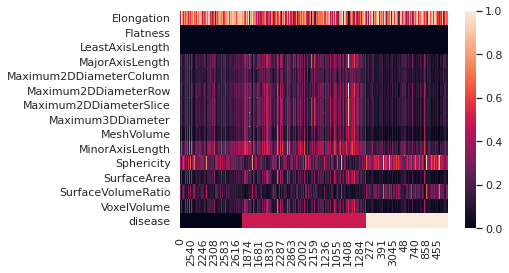

In [131]:
fig, ax = plt.subplots()

# set labels
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))

ax.set_xticklabels(df['disease'].values)
ax.set_yticklabels(df.columns)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# Heatmap
sns.heatmap(df.T)


In [ ]:
# Draw the full plot
g = sns.clustermap(iris.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

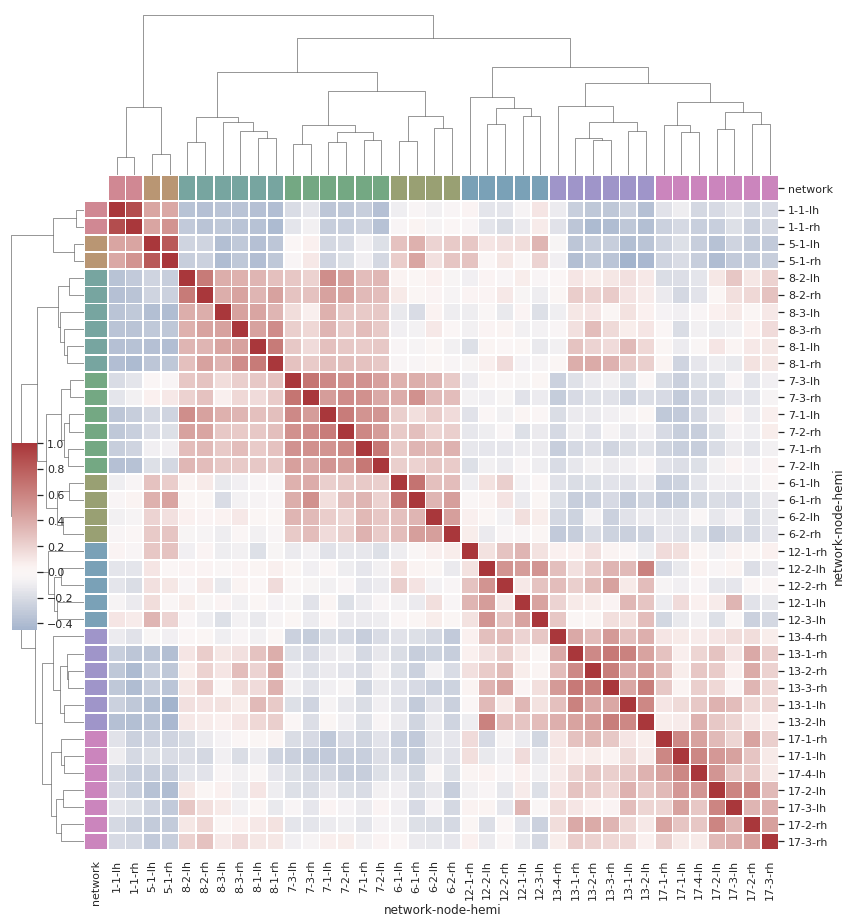

In [283]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
iris = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (iris.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
iris = iris.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = iris.columns.get_level_values("network")
network_colors = pd.Series(networks, index=iris.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(iris.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))


In [284]:
network_lut

{'1': (0.8167028311697733, 0.5345122109266688, 0.5750280113923723),
 '12': (0.47926472337389664, 0.6333002959568218, 0.7177878822401069),
 '13': (0.6254162090818173, 0.5854245228463807, 0.7893617517727602),
 '17': (0.7949032004362239, 0.5232533686100532, 0.7424428586524288),
 '5': (0.7256380093027939, 0.5865684184445076, 0.45124969098702544),
 '6': (0.601243246823196, 0.6281411529879642, 0.44959498566071004),
 '7': (0.4542447259142938, 0.6576596537208662, 0.5136454208930035),
 '8': (0.46712078684915886, 0.6454760674453914, 0.6277122757100324)}

In [159]:
iris

network           1                     5  ...         17                       
node              1                     1  ...          3                      4
hemi             lh         rh         lh  ...         lh          rh         lh
0         56.055744  92.031036 -35.898861  ... -10.520872  120.490463 -39.686432
1         55.547253  43.690075  19.568010  ... -39.607521   24.764011 -36.771008
2         60.997768  63.438793  19.247454  ...  12.985169  -75.027451   6.434262
3         18.514868  12.657158  32.896915  ... -15.819172  -37.361431  -4.650954
4         -2.527392 -63.104668  18.396759  ...   5.453649    5.169828  87.809135
..              ...        ...        ...  ...        ...         ...        ...
915       -7.429513  -4.813219   0.017912  ...  22.893030   48.274380  76.228455
916      -33.554138 -38.605621 -32.935612  ...  24.974548   51.972153  64.538788
917      -78.539566 -74.197189 -32.800556  ...  66.994400   81.539246  64.969772
918     -103.235825 -98.744286 -14.330512  ...  20.517746    3.124434  56.718388
919      -36.288868 -10.762070  26.558777  ...   8.300399   33.687531  17.960655

[920 rows x 38 columns]

In [124]:
networks

Index(['1', '1', '5', '5', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7',
       '8', '8', '8', '8', '8', '8', '12', '12', '12', '12', '12', '13', '13',
       '13', '13', '13', '13', '17', '17', '17', '17', '17', '17', '17'],
      dtype='object', name='network')